# Part A

In [1]:
#Load the libraries
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
#Read the dataset
d = pd.read_csv('delivery_time.csv')
d

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
#To find whether there are any existing null values or not
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
#Count of duplicated rows
d[d.duplicated()]

,Delivery Time,Sorting Time


<AxesSubplot:>

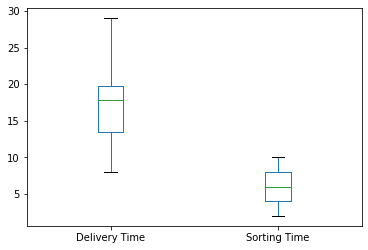

In [6]:
#Outlier Detection
d.plot(kind='box')

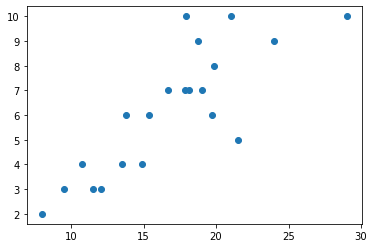

In [7]:
#To find out linearity between the variables
plt.scatter('Delivery Time','Sorting Time',data=d)

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

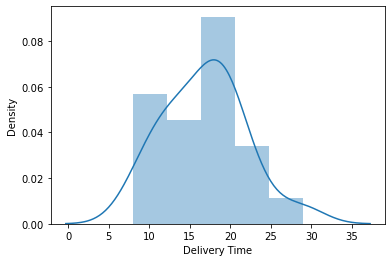

In [8]:
#To check whether the distribution is normal 
import seaborn as sns
sns.distplot(d['Delivery Time'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

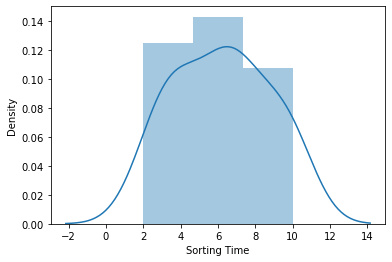

In [9]:
sns.distplot(d['Sorting Time'])

In [10]:
#To find correlation between the varaiables
d.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [11]:
#Rename the Delivery column & Sorting column
d = d.rename({'Delivery Time': 'DeliveryTime'}, axis=1)
d = d.rename({'Sorting Time': 'SortingTime'}, axis=1)
d

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


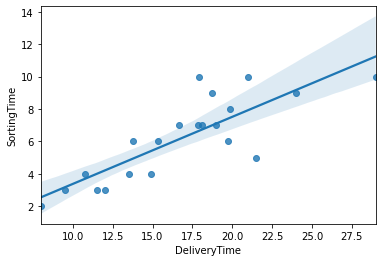

In [12]:
#Regression plot
sns.regplot(x="DeliveryTime", y="SortingTime", data=d);

In [13]:
#Model building between the two variables
import statsmodels.formula.api as smf
model1 = smf.ols("DeliveryTime~SortingTime",data = d).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 07 May 2021   Prob (F-statistic):           3.98e-06
Time:                        01:44:00   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
#Model building between the two variables wherein Y variable is considered with log function
model2 = smf.ols("DeliveryTime~np.log(SortingTime)",data = d).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Fri, 07 May 2021   Prob (F-statistic):           2.64e-06
Time:                        01:44:00   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(SortingTime)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
#Model building between the two variables wherein X variable is considered with log function
model3 = smf.ols("np.log(DeliveryTime)~SortingTime",data = d).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.711
Model:                              OLS   Adj. R-squared:                  0.696
Method:                   Least Squares   F-statistic:                     46.73
Date:                  Fri, 07 May 2021   Prob (F-statistic):           1.59e-06
Time:                          01:44:00   Log-Likelihood:                 7.7920
No. Observations:                    21   AIC:                            -11.58
Df Residuals:                        19   BIC:                            -9.495
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.1214      0.103     20.601      0.000       1.906       2.337
SortingTime     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
#Including Log parameters for existing datapoints and creating another columns for them in dataset
d['log_SortingTime']=np.log(d['SortingTime'])
d['log_DeliveryTime']=np.log(d['DeliveryTime'])
d

,DeliveryTime,SortingTime,log_SortingTime,log_DeliveryTime
0,21.00,10,2.302585,3.044522
1,13.50,4,1.386294,2.602690
2,19.75,6,1.791759,2.983153
3,24.00,9,2.197225,3.178054
4,29.00,10,2.302585,3.367296
5,15.35,6,1.791759,2.731115
6,19.00,7,1.945910,2.944439
7,9.50,3,1.098612,2.251292
8,17.90,10,2.302585,2.884801
9,18.75,9,2.197225,2.931194


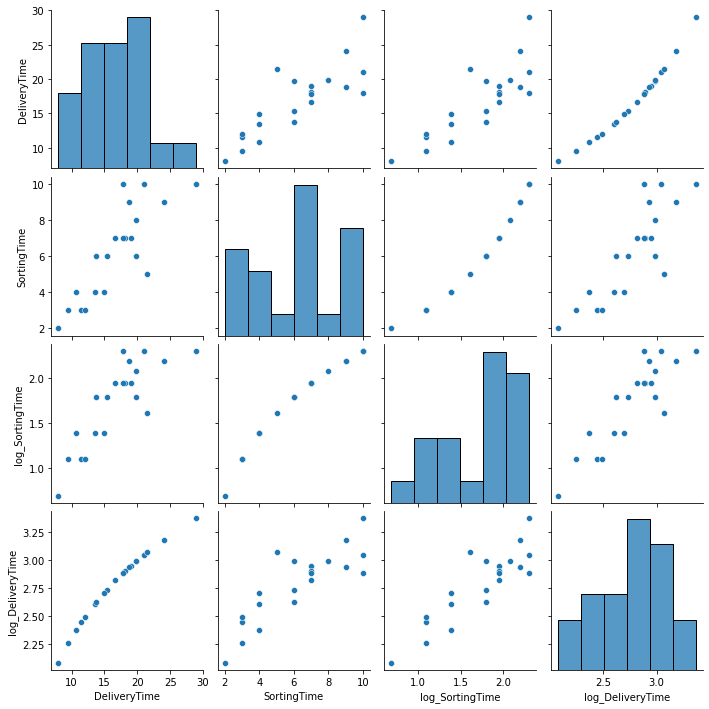

In [17]:
#To find linearity for all possible pairs in the dataset
sns.pairplot(d)

In [18]:
#To find correlation between the varaiables including log variables
d.corr()

,DeliveryTime,SortingTime,log_SortingTime,log_DeliveryTime
DeliveryTime,1.000000,0.825997,0.833933,0.981502
SortingTime,0.825997,1.000000,0.977447,0.843177
log_SortingTime,0.833933,0.977447,1.000000,0.878727
log_DeliveryTime,0.981502,0.843177,0.878727,1.000000


In [19]:
#Assigning the new X variable
newdata=pd.Series([4])

In [20]:
data_pred=pd.DataFrame(newdata,columns=['SortingTime'])
data_pred

,SortingTime
0,4


In [21]:
#Prediction for Y variable with respect to X variable
model3.predict(data_pred)

0    2.543578
dtype: float64

In [22]:
from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(d,test_size = 0.2)
train_data

,DeliveryTime,SortingTime,log_SortingTime,log_DeliveryTime
15,14.88,4,1.386294,2.700018
14,12.03,3,1.098612,2.487404
7,9.50,3,1.098612,2.251292
16,13.75,6,1.791759,2.621039
4,29.00,10,2.302585,3.367296
11,10.75,4,1.386294,2.374906
2,19.75,6,1.791759,2.983153
12,16.68,7,1.945910,2.814210
18,8.00,2,0.693147,2.079442
10,19.83,8,2.079442,2.987196


In [23]:
#final model building using train_data
model_final = smf.ols("np.log(DeliveryTime)~SortingTime",data = train_data).fit()
model_final.summary()

C:\Users\G Saarika\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.692
Model:                              OLS   Adj. R-squared:                  0.670
Method:                   Least Squares   F-statistic:                     31.42
Date:                  Fri, 07 May 2021   Prob (F-statistic):           6.49e-05
Time:                          01:44:05   Log-Likelihood:                 4.2675
No. Observations:                    16   AIC:                            -4.535
Df Residuals:                        14   BIC:                            -2.990
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.1090      0.124     16.999      0.000       1.843       2.375
SortingTime     0.1074      0.019      5.605      0.000       0.066       0.148
==============================================================================
Omnibus:                        0.788   Durbin-Watson:                   2.342
Prob(Omnibus):                  0.674   Jarque-Bera (JB):                0.533
Skew:                           0.415   Prob(JB):                        0.766
Kurtosis:                       2.667   Cond. No.                         16.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
p = model_final.predict(test_data)
predvalue = np.exp(p)
predvalue

19    17.474830
1     12.661885
5     15.695485
9     21.661541
3     21.661541
dtype: float64

In [25]:
#To calculate RMSE Values
def RMSE(pred,actual):
    return np.sqrt(np.mean((actual-pred)**2))

In [26]:
#predict y values for train data 
train_yhat = np.exp(model_final.predict(train_data))
train_y = train_data.DeliveryTime
RMSE_train = RMSE(train_yhat, train_y)
print("RMSE value of train data is",round(RMSE_train,4))

RMSE value of train data is 3.242


In [27]:
#predict y values for test data
test_yhat = np.exp(model_final.predict(test_data))
test_y = test_data.DeliveryTime
RMSE_test = RMSE(test_yhat,test_y)
print("RMSE value of test data is",round(RMSE_test,4))

RMSE value of test data is 1.7259


In [28]:
#Conclusion - As the RMSE value for this final models are similar and very less we can consider this best model.

# Part B

In [37]:
#Read the dataset
s = pd.read_csv('Salary_Data.csv')
s

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [38]:
#To find whether there are any existing null values or not
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [39]:
#Count of duplicated rows
s[s.duplicated()]

,YearsExperience,Salary


{'whiskers': [<matplotlib.lines.Line2D at 0x133862d6790>,
 'caps': [<matplotlib.lines.Line2D at 0x133862d6e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x133862d6430>],
 'medians': [<matplotlib.lines.Line2D at 0x133862e0550>],
 'fliers': [<matplotlib.lines.Line2D at 0x133862e08b0>],
 'means': []}

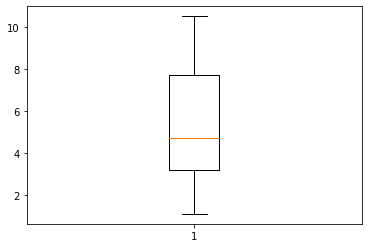

In [40]:
#Outlier Detection
plt.boxplot(s['YearsExperience'])

<AxesSubplot:>

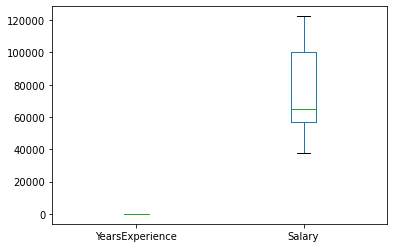

In [41]:
s.plot(kind='box')

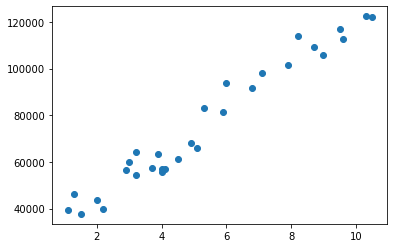

In [42]:
#To find out linearity between the variables
plt.scatter('YearsExperience','Salary',data=s)

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

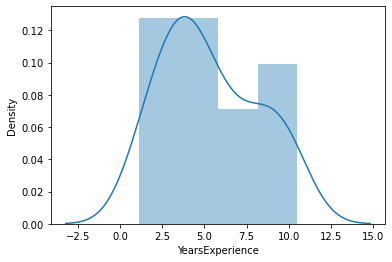

In [43]:
#To check whether the distribution is normal
sns.distplot(s['YearsExperience'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

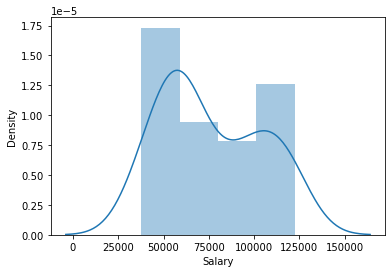

In [44]:
sns.distplot(s['Salary'])

In [45]:
#To find correlation between the variables
s.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


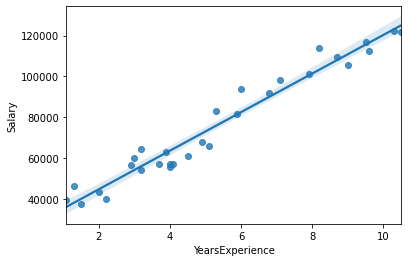

In [46]:
#Regression plot
sns.regplot(x="YearsExperience", y="Salary", data=s);

In [47]:
#Model building between the two variables
model4 = smf.ols("Salary~YearsExperience",data = s).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 07 May 2021   Prob (F-statistic):           1.14e-20
Time:                        01:44:25   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
#Model building between the two variables wherein X variable is considered with log function
model5 = smf.ols("np.log(Salary)~YearsExperience",data = s).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Fri, 07 May 2021   Prob (F-statistic):           7.03e-18
Time:                        01:44:25   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
#Model building between the two variables wherein Y variable is considered with log function
model6 = smf.ols("Salary~np.log(YearsExperience)",data = s).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Fri, 07 May 2021   Prob (F-statistic):           3.25e-13
Time:                        01:44:26   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

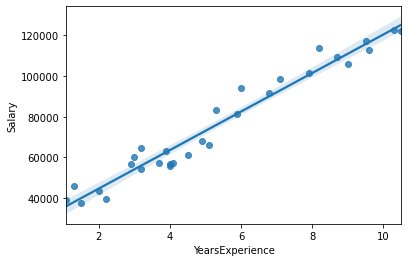

In [50]:
#Regression plot
sns.regplot(x="YearsExperience", y="Salary", data=s);

In [51]:
#Including Log parameters for existing datapoints and creating another columns for them in dataset
s['log_YearsExperience']=np.log(s['YearsExperience'])
s['log_Salary']=np.log(s['Salary'])
s

,YearsExperience,Salary,log_YearsExperience,log_Salary
0,1.1,39343.0,0.095310,10.580073
1,1.3,46205.0,0.262364,10.740843
2,1.5,37731.0,0.405465,10.538237
3,2.0,43525.0,0.693147,10.681091
4,2.2,39891.0,0.788457,10.593906
5,2.9,56642.0,1.064711,10.944506
6,3.0,60150.0,1.098612,11.004597
7,3.2,54445.0,1.163151,10.904946
8,3.2,64445.0,1.163151,11.073567
9,3.7,57189.0,1.308333,10.954117


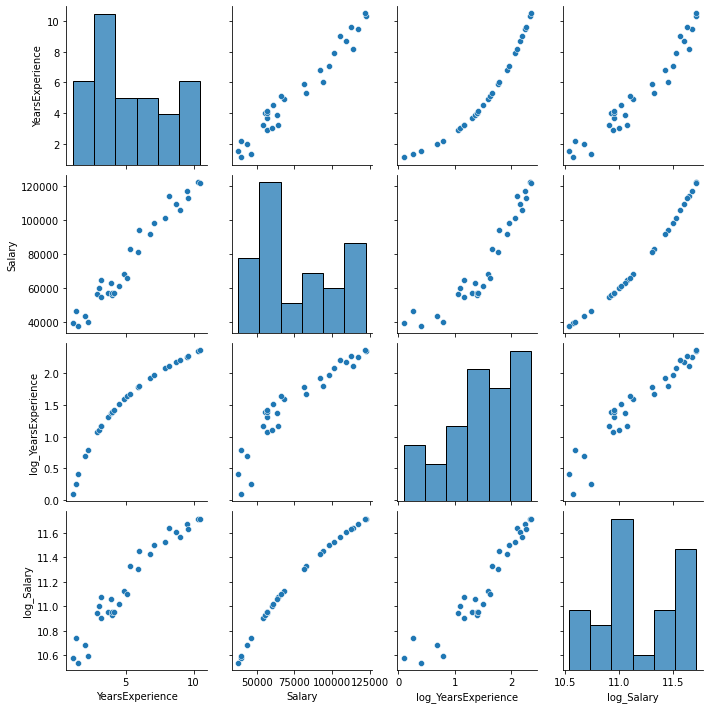

In [52]:
#To find linearity for all possible pairs in the dataset
sns.pairplot(s)

In [53]:
#To find correlation between the varaiables including log variables
s.corr()

,YearsExperience,Salary,log_YearsExperience,log_Salary
YearsExperience,1.000000,0.978242,0.953797,0.965384
Salary,0.978242,1.000000,0.924061,0.988531
log_YearsExperience,0.953797,0.924061,1.000000,0.951428
log_Salary,0.965384,0.988531,0.951428,1.000000


In [54]:
#Assigning the new X variable
ns=pd.Series([6])

In [55]:
data_preds=pd.DataFrame(ns,columns=['YearsExperience'])
data_preds

,YearsExperience
0,6


In [56]:
#Prediction for Y variable with respect to X variable
model4.predict(data_preds)

0    82491.974127
dtype: float64

In [57]:
train_data1,test_data1 = train_test_split(s,test_size = 0.2)
train_data1

,YearsExperience,Salary,log_YearsExperience,log_Salary
25,9.0,105582.0,2.197225,11.567243
11,4.0,55794.0,1.386294,10.929422
28,10.3,122391.0,2.332144,11.714976
19,6.0,93940.0,1.791759,11.450412
3,2.0,43525.0,0.693147,10.681091
12,4.0,56957.0,1.386294,10.950052
23,8.2,113812.0,2.104134,11.642303
26,9.5,116969.0,2.251292,11.669664
10,3.9,63218.0,1.360977,11.054344
4,2.2,39891.0,0.788457,10.593906


In [58]:
#final model building using train_data
model_final1 = smf.ols("Salary~YearsExperience",data = train_data1).fit()
model_final1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     503.9
Date:                Fri, 07 May 2021   Prob (F-statistic):           1.18e-16
Time:                        01:44:32   Log-Likelihood:                -241.25
No. Observations:                  24   AIC:                             486.5
Df Residuals:                      22   BIC:                             488.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.554e+04   2610.089      9.785      0.000    2.01e+04     3.1e+04
YearsExperience  9495.9954    423.014     22.448      0.000    8618.719    1.04e+04
==============================================================================
Omnibus:                        1.613   Durbin-Watson:                   2.433
Prob(Omnibus):                  0.446   Jarque-Bera (JB):                1.359
Skew:                           0.430   Prob(JB):                        0.507
Kurtosis:                       2.213   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
z = model_final1.predict(test_data1)
z

21     92960.692595
16     73968.701756
2      39783.118246
22    100557.488930
15     72069.502672
1      37883.919162
dtype: float64

In [60]:
#To calculate RMSE Values
def RMSE(pred,actual):
    return np.sqrt(np.mean((actual-pred)**2))

In [61]:
#predict y values for train data 
train_yhat1 = model_final1.predict(train_data1)
train_y1 = train_data1.Salary
RMSE_train1 = RMSE(train_yhat1, train_y1)
print("RMSE value of train data is",round(RMSE_train1,4))

RMSE value of train data is 5613.566


In [62]:
#predict y values for test data
test_yhat1 = model_final1.predict(test_data1)
test_y1 = test_data1.Salary
RMSE_test1 = RMSE(test_yhat1,test_y1)
print("RMSE value of test data is",round(RMSE_test1,4))

RMSE value of test data is 5512.6319


In [63]:
#Conclusion - As the RMSE value for this final models are similar we can consider this best model.